<a href="https://colab.research.google.com/github/habibarezq/ML-Assignments-25/blob/main/Assignment-2/notebooks/comprehensive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part C — Comprehensive Analysis



In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import os , sys
## uncomment this if you are running on vs code
# sys.path.append(os.path.abspath("../"))
# from src.logisitc_manual import LogisticRegression
# from src.softmax_manual import SoftmaxRegression
# from src.nn_manual import *
# from src.data_preprocessing import *


# For reproducibility
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [2]:
# comment if you are on vs code
from google.colab import files
uploaded = files.upload()
from logisitc_manual import LogisticRegression
from softmax_manual import SoftmaxRegression
from data_preprocessing import *
from nn_manual import *

Saving __init__.py to __init__.py
Saving data_preprocessing.py to data_preprocessing.py
Saving logisitc_manual.py to logisitc_manual.py
Saving nn_manual.py to nn_manual.py
Saving softmax_manual.py to softmax_manual.py


# Data Loading and Preprocessing

### For Logisitc Regression (Class 0 vs 1)

In [3]:
binary_data = MNISTDataLoader(batch_size=32, binary=True, digits=(0, 1))
train_loader_bin, val_loader_bin, test_loader_bin = binary_data.get_loaders()

100%|██████████| 9.91M/9.91M [00:00<00:00, 20.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 500kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.62MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 14.2MB/s]


## For Softmax Regression and NN

In [4]:
multi_data = MNISTDataLoader(batch_size=32, binary=False)
train_loader, val_loader, test_loader = multi_data.get_loaders()

## C1 — Hyperparameter Analysis

### C1.1 Learning Rate Analysis



=== LR = 0.001 ===
Epoch 1/20 Train Loss: 2.0495 Train Acc: 0.3789 Val Loss: 1.7045 Val Acc: 0.6111Grad Noise: 0.000017 Norm: 1.5236
Epoch 2/20 Train Loss: 1.3569 Train Acc: 0.7101 Val Loss: 1.0621 Val Acc: 0.7729Grad Noise: 0.000023 Norm: 1.7200
Epoch 3/20 Train Loss: 0.8890 Train Acc: 0.7970 Val Loss: 0.7548 Val Acc: 0.8231Grad Noise: 0.000027 Norm: 1.7495
Epoch 4/20 Train Loss: 0.6778 Train Acc: 0.8324 Val Loss: 0.6119 Val Acc: 0.8452Grad Noise: 0.000028 Norm: 1.7512
Epoch 5/20 Train Loss: 0.5689 Train Acc: 0.8523 Val Loss: 0.5298 Val Acc: 0.8625Grad Noise: 0.000029 Norm: 1.7636
Epoch 6/20 Train Loss: 0.5023 Train Acc: 0.8668 Val Loss: 0.4769 Val Acc: 0.8730Grad Noise: 0.000029 Norm: 1.7538
Epoch 7/20 Train Loss: 0.4575 Train Acc: 0.8772 Val Loss: 0.4402 Val Acc: 0.8817Grad Noise: 0.000030 Norm: 1.7667
Epoch 8/20 Train Loss: 0.4250 Train Acc: 0.8853 Val Loss: 0.4119 Val Acc: 0.8865Grad Noise: 0.000031 Norm: 1.7872
Epoch 9/20 Train Loss: 0.4000 Train Acc: 0.8903 Val Loss: 0.3911 Val

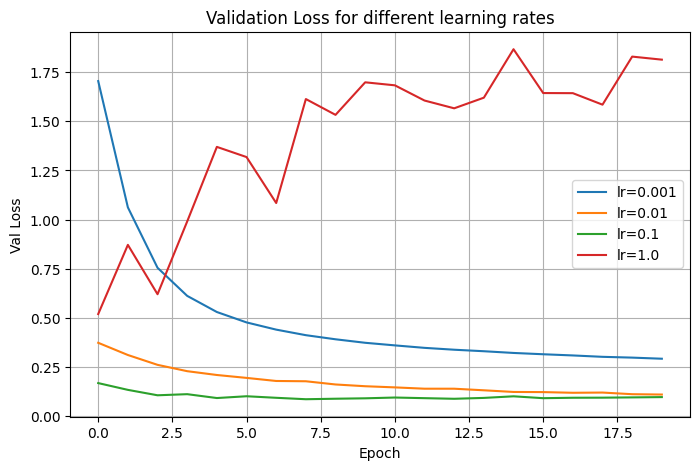

,lr,final_val_acc
0,0.001,0.917643
1,0.010,0.967857
2,0.100,0.977857
3,1.000,0.180714


In [6]:
learning_rates = [0.001, 0.01, 0.1, 1.0]
num_epochs = 20
batch_size = 64
results_lr = []
for lr in learning_rates:
    print(f"\n=== LR = {lr} ===")
    model = CustomFeedforwardNN()
    tl, vl, ta, va, grad_noise = train_model_once(model, train_loader, val_loader, epochs=num_epochs, learning_rate=lr)
    results_lr.append({'lr': lr, 'train_losses': tl, 'val_losses': vl, 'train_acc': ta, 'val_acc': va,'grad_noise': grad_noise})


# Plot validation loss comparison
plt.figure(figsize=(8,5))
for res in results_lr:
    plt.plot(res['val_losses'], label=f"lr={res['lr']}")
plt.xlabel('Epoch'); plt.ylabel('Val Loss'); plt.title('Validation Loss for different learning rates'); plt.legend(); plt.grid(True); plt.show()

# Summarize final val accuracy
pd.DataFrame([{'lr': r['lr'], 'final_val_acc': r['val_acc'][-1]} for r in results_lr])


### C1.2 Batch Size Analysis



=== Batch size = 16 ===
Epoch 1/20 Train Loss: 0.7736 Train Acc: 0.7930 Val Loss: 0.3793 Val Acc: 0.8951Grad Noise: 0.000029 Norm: 1.7612
Epoch 2/20 Train Loss: 0.3344 Train Acc: 0.9056 Val Loss: 0.2996 Val Acc: 0.9140Grad Noise: 0.000031 Norm: 1.7825
Epoch 3/20 Train Loss: 0.2769 Train Acc: 0.9203 Val Loss: 0.2603 Val Acc: 0.9283Grad Noise: 0.000030 Norm: 1.7236
Epoch 4/20 Train Loss: 0.2418 Train Acc: 0.9299 Val Loss: 0.2324 Val Acc: 0.9341Grad Noise: 0.000028 Norm: 1.6666
Epoch 5/20 Train Loss: 0.2154 Train Acc: 0.9381 Val Loss: 0.2163 Val Acc: 0.9381Grad Noise: 0.000026 Norm: 1.5907
Epoch 6/20 Train Loss: 0.1950 Train Acc: 0.9440 Val Loss: 0.1948 Val Acc: 0.9453Grad Noise: 0.000025 Norm: 1.5646
Epoch 7/20 Train Loss: 0.1779 Train Acc: 0.9496 Val Loss: 0.1794 Val Acc: 0.9486Grad Noise: 0.000025 Norm: 1.5242
Epoch 8/20 Train Loss: 0.1633 Train Acc: 0.9537 Val Loss: 0.1748 Val Acc: 0.9513Grad Noise: 0.000024 Norm: 1.4809
Epoch 9/20 Train Loss: 0.1510 Train Acc: 0.9570 Val Loss: 0.160

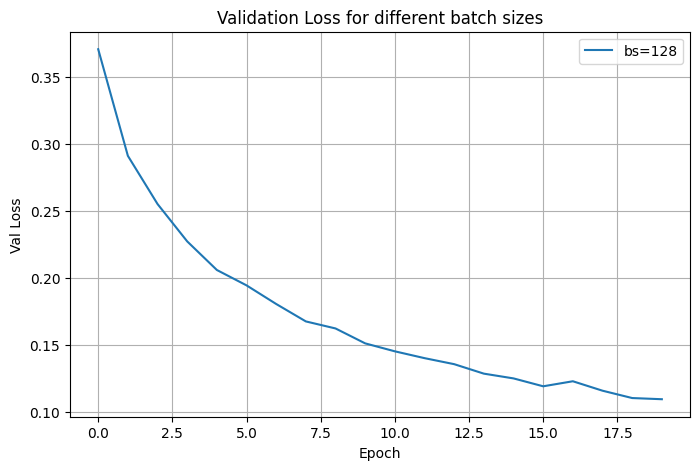

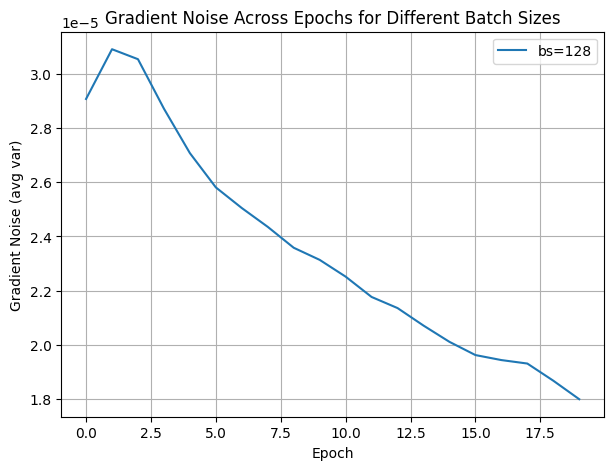

In [8]:
batch_sizes = [16, 32, 64, 128]
num_epochs = 20
results_bs = []
try:
    X_train_flat
    recreate_loaders = True
except NameError:
    recreate_loaders = False
for bs in batch_sizes:
    print(f"\n=== Batch size = {bs} ===")
    if recreate_loaders:
        train_loader_bs = DataLoader(TensorDataset(X_train_flat, y_train), batch_size=bs, shuffle=True)
        val_loader_bs = DataLoader(TensorDataset(X_val_flat, y_val), batch_size=bs, shuffle=False)

    else:
        train_loader_bs = train_loader; val_loader_bs = val_loader
    model = CustomFeedforwardNN()
    start = time.time()

    tl, vl, ta, va, grad_noise = train_model_once(
    model, train_loader_bs, val_loader_bs, epochs=num_epochs, learning_rate=0.01
)
    duration = time.time() - start
results_bs.append({'bs': bs,'train_losses': tl,'val_losses': vl,'train_acc': ta,'val_acc': va,'grad_noise': grad_noise,'time_s': duration})


plt.figure(figsize=(8,5))
for res in results_bs:
    plt.plot(res['val_losses'], label=f"bs={res['bs']}")
plt.xlabel('Epoch'); plt.ylabel('Val Loss'); plt.title('Validation Loss for different batch sizes'); plt.legend(); plt.grid(True); plt.show()

pd.DataFrame([{'batch_size': r['bs'], 'final_val_acc': r['val_acc'][-1], 'time_s': r['time_s']} for r in results_bs])
# plotting the gradient noise
plt.figure(figsize=(7,5))
for r in results_bs:
    noise_values = [x['noise'] for x in r['grad_noise']]
    plt.plot(noise_values, label=f"bs={r['bs']}")
plt.xlabel("Epoch")
plt.ylabel("Gradient Noise (avg var)")
plt.title("Gradient Noise Across Epochs for Different Batch Sizes")
plt.legend()
plt.grid(True)
plt.show()


### C1.3 Architecture Analysis


Function to make fully connected NN based on number of hidden layers

In [9]:
def make_ffnn(hidden_sizes):
    # hidden_sizes: list of ints
    if len(hidden_sizes) == 1:
        return CustomFeedforwardNN(input_size=784, hidden1_size=hidden_sizes[0], hidden2_size=64, output_size=10)
    elif len(hidden_sizes) == 2:
        return CustomFeedforwardNN(input_size=784, hidden1_size=hidden_sizes[0], hidden2_size=hidden_sizes[1], output_size=10)
    else:
        # for >2 layers create dynamic module
        return FFN_dynamic(input_dim=784, hidden_sizes=hidden_sizes, output_dim=10)

In [12]:
layers_options = [ [64,64], [128,64], [256,128,64], [512,256,128,64] ]
results_arch = []
for hidden in layers_options:
    print(f"\n=== Arch: {hidden} ===")
    model = make_ffnn(hidden)
    tl, vl, ta, va,grad_noise = train_model_once(model, train_loader, val_loader, epochs=20, learning_rate=0.01)
    results_arch.append({'hidden': hidden, 'train_acc': ta[-1], 'val_acc': va[-1], 'train_losses': tl, 'val_losses': vl, 'grad_noise': grad_noise})

pd.DataFrame([{'architecture': str(r['hidden']), 'train_acc': r['train_acc'], 'val_acc': r['val_acc']} for r in results_arch])



=== Arch: [64, 64] ===
Epoch 1/20 Train Loss: 0.8152 Train Acc: 0.7769 Val Loss: 0.3877 Val Acc: 0.8907Grad Noise: 0.000057 Norm: 1.7407
Epoch 2/20 Train Loss: 0.3451 Train Acc: 0.9015 Val Loss: 0.3153 Val Acc: 0.9112Grad Noise: 0.000065 Norm: 1.8159
Epoch 3/20 Train Loss: 0.2932 Train Acc: 0.9147 Val Loss: 0.2742 Val Acc: 0.9224Grad Noise: 0.000063 Norm: 1.7738
Epoch 4/20 Train Loss: 0.2614 Train Acc: 0.9239 Val Loss: 0.2528 Val Acc: 0.9265Grad Noise: 0.000060 Norm: 1.7258
Epoch 5/20 Train Loss: 0.2370 Train Acc: 0.9314 Val Loss: 0.2331 Val Acc: 0.9331Grad Noise: 0.000058 Norm: 1.6844
Epoch 6/20 Train Loss: 0.2167 Train Acc: 0.9374 Val Loss: 0.2154 Val Acc: 0.9376Grad Noise: 0.000056 Norm: 1.6387
Epoch 7/20 Train Loss: 0.1991 Train Acc: 0.9431 Val Loss: 0.2026 Val Acc: 0.9413Grad Noise: 0.000054 Norm: 1.6003
Epoch 8/20 Train Loss: 0.1840 Train Acc: 0.9468 Val Loss: 0.1887 Val Acc: 0.9471Grad Noise: 0.000052 Norm: 1.5719
Epoch 9/20 Train Loss: 0.1713 Train Acc: 0.9503 Val Loss: 0.1801

,architecture,train_acc,val_acc
0,"[64, 64]",0.972929,0.963643
1,"[128, 64]",0.980262,0.969214
2,"[256, 128, 64]",0.992476,0.973429
3,"[512, 256, 128, 64]",0.997738,0.975429


## C2 — Model Comparison


Function to evaluate on test data

In [13]:
def evaluate_nn_on_loader(model, loader):
    model.to(device); model.eval()
    correct = 0; total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            correct += (preds.cpu() == y_batch).sum().item()
            total += y_batch.size(0)
    return correct/total, np.array(y_true), np.array(y_pred)

In [14]:
# Logistic Regression (Binary)
log_model = LogisticRegression(input_dim=784, learning_rate=0.01, max_epochs=50,patience=5)
start_log = time.time()
log_model.fit(train_loader_bin, val_loader_bin)
log_time = time.time() - start_log


# Softmax Regression (multiclass)
soft_model = SoftmaxRegression(input_dim=784, num_classes=10, learning_rate=0.01,max_epochs=50,patience=5)
start_soft=time.time()
soft_model.fit(train_loader, val_loader)
soft_time = time.time() - start_soft

# Neural network
best_hidden = results_arch[3]['hidden'] if len(results_arch)>1 else [128,64]
best_model = make_ffnn(best_hidden)
start = time.time()
tl, vl, ta, va, grad_noise = train_model_once(best_model, train_loader, val_loader, epochs=30, learning_rate=0.01)
nn_time = time.time() - start

# Evaluate Logistic on test
_,_,log_test_loss, log_test_acc = log_model.evaluate_test(binary_data.X_test, binary_data.y_test)
print('Logistic test acc:', log_test_acc)


# Evaluate Softmax on test
_,_,soft_test_loss, soft_test_acc = soft_model.evaluate_test(multi_data.X_test,multi_data.y_test)
print('Softmax test acc:', soft_test_acc)

# Evaluate NN on test
nn_test_acc, y_true_nn, y_pred_nn = evaluate_nn_on_loader(best_model, test_loader)
print('NN test acc:', nn_test_acc)

if torch.is_tensor(log_test_acc) and log_test_acc.numel() > 1:
    log_test_acc = (log_test_acc.mean()).item()
elif torch.is_tensor(log_test_acc):
    log_test_acc = log_test_acc.item()

# Summary table
comparison = pd.DataFrame([
    {'Model': 'Logistic Regression', 'Test Accuracy': float(log_test_acc), 'Training Time': log_time},
    {'Model': 'Softmax Regression', 'Test Accuracy': float(soft_test_acc), 'Training Time': soft_time},
    {'Model': f'Neural Network {best_hidden}', 'Test Accuracy': float(nn_test_acc), 'Training Time': nn_time}
])
comparison

Epoch 10/50 - Train Loss: 0.0117, Train Acc: 0.9985 - Val Loss: 0.0126, Val Acc: 0.9970
Epoch 20/50 - Train Loss: 0.0078, Train Acc: 0.9985 - Val Loss: 0.0093, Val Acc: 0.9970
Epoch 30/50 - Train Loss: 0.0063, Train Acc: 0.9988 - Val Loss: 0.0081, Val Acc: 0.9970
Epoch 40/50 - Train Loss: 0.0054, Train Acc: 0.9988 - Val Loss: 0.0074, Val Acc: 0.9976
Epoch 50/50 - Train Loss: 0.0048, Train Acc: 0.9989 - Val Loss: 0.0070, Val Acc: 0.9983
Epoch 10/50 - Train Loss: 0.3329, Train Acc: 0.9082 - Val Loss: 0.3336, Val Acc: 0.9080
Epoch 20/50 - Train Loss: 0.3018, Train Acc: 0.9164 - Val Loss: 0.3078, Val Acc: 0.9150
Epoch 30/50 - Train Loss: 0.2876, Train Acc: 0.9200 - Val Loss: 0.2970, Val Acc: 0.9185
Epoch 40/50 - Train Loss: 0.2790, Train Acc: 0.9221 - Val Loss: 0.2914, Val Acc: 0.9199
Epoch 50/50 - Train Loss: 0.2730, Train Acc: 0.9238 - Val Loss: 0.2874, Val Acc: 0.9214

Restored best model (Val Loss = 0.2874)
Epoch 1/30 Train Loss: 0.7258 Train Acc: 0.8035 Val Loss: 0.3077 Val Acc: 0.912

,Model,Test Accuracy,Training Time
0,Logistic Regression,0.997632,11.812903
1,Softmax Regression,0.916786,61.454436
2,"Neural Network [512, 256, 128, 64]",0.977357,421.957615


Conclusion:

Logistic Regression, Softmax Regression, and Neural Networks differ in both their computational complexity and their ability to capture relationships in data.

1. Logistic Regression is best suited for binary classification tasks.When data is linearly separable ,logistic regression offers a transparent view of how input features influence predictions. However, it cannot handle multiple classes directly without a one-vs-rest setup, and it fails to capture non-linear relationships.

2. Softmax Regression, also known as multinomial logistic regression, acts as an extension for logistic regression to multiclass problems. It maintains efficiency and interpretability while handling multiple output categories. Despite its simplicity, it struggles when the decision boundaries between classes are highly non-linear or complex.

3. Neural Networks (Feedforward Models) represent a powerful generalization that can capture complex, non-linear patterns. By stacking multiple layers, they learn abstract representations of data and can achieve way better accuracy But, they come at the cost of higher computational requirements, longer training time. and they require careful tuning of hyperparameters (learning rate, number of layers, neurons) to achieve stable convergence.

In summary, Logistic Regression and Softmax Regression serve as efficient and interpretable models for linear relationships. Neural Networks, as they're more complex,making them more suitable for large-scale or highly non-linear tasks. The choice of model depends on the problem complexity, dataset size and other parameters.

## C2.1 Confusion Matrix & Misclassified Examples (Best NN)


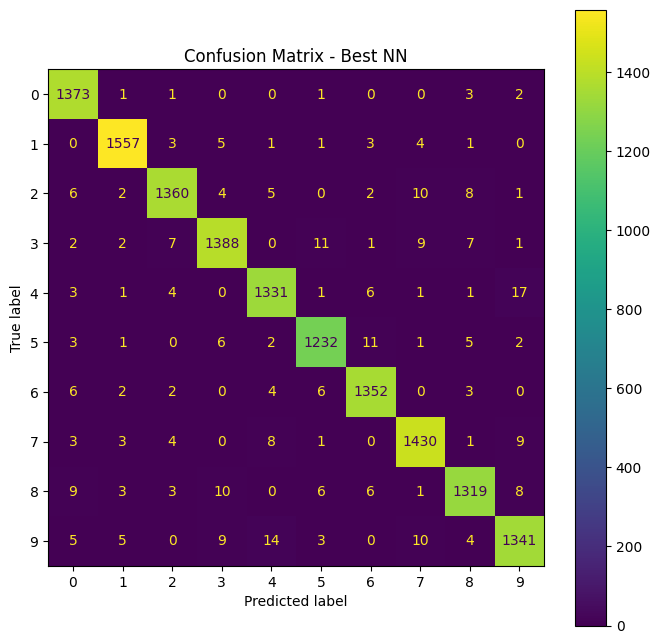

Total misclassified: 317


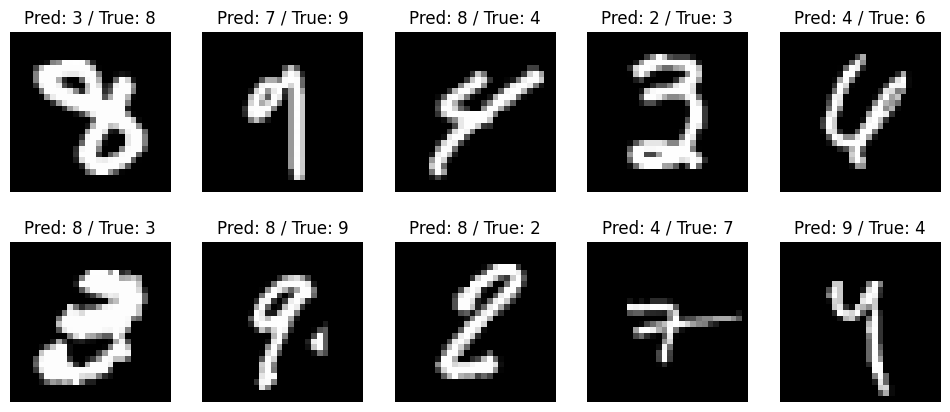

In [15]:
cm = confusion_matrix(y_true_nn, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax)
plt.title('Confusion Matrix - Best NN')
plt.show()

# Show some misclassified examples
mis_idx = np.where(y_true_nn != y_pred_nn)[0]
print('Total misclassified:', len(mis_idx))


dataset_for_vis = test_loader.dataset
fig, axes = plt.subplots(2,5, figsize=(12,5))
for i, ax in enumerate(axes.flat):
    if i >= len(mis_idx): break
    idx = mis_idx[i]
    # if dataset stores flattened images, reshape
    img_flat, true_label = dataset_for_vis[idx]
    if img_flat.ndim == 1:
        img = img_flat.reshape(28,28)
    else:
        img = img_flat.squeeze()
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Pred: {y_pred_nn[idx]} / True: {y_true_nn[idx]}")
    ax.axis('off')
plt.show()

## C3 — Final Evaluation & Retraining Best Model on Train+Val


In [16]:
# Combine train + val into one dataset and retrain best model
final_model = make_ffnn(best_hidden)
# train
train_model_once(final_model, train_loader, test_loader, epochs=30, learning_rate=0.01)
final_acc, y_true_final, y_pred_final = evaluate_nn_on_loader(final_model, test_loader)
print('Final test acc after retraining on train+val:', final_acc)

Epoch 1/30 Train Loss: 0.6908 Train Acc: 0.8186 Val Loss: 0.3331 Val Acc: 0.9021Grad Noise: 0.000016 Norm: 2.8696
Epoch 2/30 Train Loss: 0.2589 Train Acc: 0.9252 Val Loss: 0.2219 Val Acc: 0.9352Grad Noise: 0.000016 Norm: 2.8930
Epoch 3/30 Train Loss: 0.1926 Train Acc: 0.9445 Val Loss: 0.1844 Val Acc: 0.9445Grad Noise: 0.000014 Norm: 2.6452
Epoch 4/30 Train Loss: 0.1531 Train Acc: 0.9555 Val Loss: 0.1603 Val Acc: 0.9536Grad Noise: 0.000012 Norm: 2.4536
Epoch 5/30 Train Loss: 0.1258 Train Acc: 0.9641 Val Loss: 0.1362 Val Acc: 0.9596Grad Noise: 0.000012 Norm: 2.3284
Epoch 6/30 Train Loss: 0.1048 Train Acc: 0.9703 Val Loss: 0.1375 Val Acc: 0.9592Grad Noise: 0.000011 Norm: 2.1701
Epoch 7/30 Train Loss: 0.0906 Train Acc: 0.9742 Val Loss: 0.1225 Val Acc: 0.9626Grad Noise: 0.000010 Norm: 2.0987
Epoch 8/30 Train Loss: 0.0779 Train Acc: 0.9775 Val Loss: 0.1104 Val Acc: 0.9654Grad Noise: 0.000010 Norm: 2.0423
Epoch 9/30 Train Loss: 0.0670 Train Acc: 0.9810 Val Loss: 0.1029 Val Acc: 0.9687Grad Noi